In [1]:
from influxdb import InfluxDBClient, DataFrameClient
from influxdb import exceptions
import pandas as pd

In [3]:
client = InfluxDBClient('172.18.0.2', 8086)
client.ping()

'1.8.0'

In [4]:
client.switch_database('testdb')

In [5]:
client.get_list_measurements()

[{'name': 'cpu_load_short'}, {'name': 'mxx'}]

In [6]:
client.get_list_series(measurement='mxx')

['mxx,measurement_type=day,source=yahoo']

In [7]:
results = client.query('Select time,value from mxx')

In [8]:
df = pd.DataFrame([x for x in results][0])

In [38]:
df['time']= pd.to_datetime(df.time)

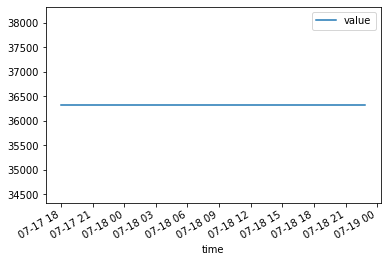

In [41]:
df.set_index('time').plot()

In [43]:
%%writefile influxdb_client.py
from influxdb import InfluxDBClient, DataFrameClient
from influxdb import exceptions
import pandas as pd
import config

def connect_database(db_name='testdb'):
    try:
        client = InfluxDBClient( host =config.influxdb_config.get('influxdb_host'),
                                port = config.influxdb_config.get('influxdb_port'),
                                database=config.influxdb_config.get('influxdb_db')
                               )
        client.ping()
    except Exception as e:
        print('error connecting to database: {}'.format(e))
        raise
    return client

def query_to_dataframe(client ,query = 'Select time,value from mxx'):
    try:
        results = client.query(query)
        df = pd.DataFrame([x for x in results][0])
        df['time']= pd.to_datetime(df.time)
    except Exception as e:
        print('error querying to database: {}'.format(e))
        raise
    return df

Writing influxdb_client.py


In [40]:
client = connect_database()

In [41]:
df= query_to_dataframe(client)

In [44]:
df

,time,value
0,2020-07-17 18:00:13.389995+00:00,36327.839844
1,2020-07-17 18:35:43.009230+00:00,36327.839844
2,2020-07-17 23:40:32.066297+00:00,36327.839844
3,2020-07-17 23:52:27.720545+00:00,36327.839844
4,2020-07-17 23:52:29.563945+00:00,36327.839844
...,...,...
562,2020-07-18 22:52:21.071922+00:00,36327.839844
563,2020-07-18 22:52:23.031373+00:00,36327.839844
564,2020-07-18 22:52:24.797042+00:00,36327.839844
565,2020-07-18 22:52:26.662244+00:00,36327.839844
